# **RETAIL SALES FORECASTING**

by : Alfa Isa Dewa

## **Stakeholders:**

1. Tim Manajemen dan Eksekutif :
    + Menggunakan prediksi penjualan untuk membuat keputusan strategis, seperti penetapan target, alokasi anggaran, dan perencanaan ekspansi.
2. Tim Pemasaran :
    + Memanfaatkan hasil prediksi untuk merancang kampanye pemasaran yang sesuai dengan tren penjualan, mengidentifikasi waktu promosi terbaik, dan mengukur efektivitas kampanye sebelumnya.


## **Business Understanding**

**Context:**

Retail Sales merupakan sektor bisnis yang berkaitan dengan penjualan barang atau jasa langsung kepada konsumen akhir untuk penggunaan pribadi. Dalam konteks ini, sebuah perusahaan retail berskala nasional yang menjual berbagai produk seperti pakaian, elektronik, peralatan rumah tangga, dan kebutuhan sehari-hari ingin meningkatkan efisiensi operasional dan mengoptimalkan stok inventori mereka.

Perusahaan ini memiliki jaringan toko yang tersebar di berbagai kota besar di Indonesia dan telah mengumpulkan data penjualan historis selama beberapa tahun terakhir. Dengan volume transaksi yang besar dan kompleksitas dalam mengelola berbagai kategori produk, perusahaan membutuhkan sistem prediksi penjualan yang akurat untuk membantu dalam pengambilan keputusan bisnis yang lebih baik.

**Problem Statement:**

Perusahaan ingin meningkatkan ketepatan perencanaan persediaan dengan **memperkirakan penjualan (sales) 30 hari ke depan dan menentukan safety stock yang optimal.** Saat ini, fluktuasi permintaan sering menyebabkan ketidakseimbangan persediaan, yang dapat mengarah pada kekurangan stok atau kelebihan stok, meningkatkan biaya penyimpanan atau potensi hilangnya penjualan. Oleh karena itu, diperlukan model prediksi yang akurat untuk memastikan tingkat layanan 95% dengan safety stock yang optimal.

**Goals:**

Memprediksi penjualan (sales) 30 hari ke depan untuk mendukung perencanaan persediaan dan operasional.
Menentukan safety stock yang sesuai untuk lead time 30 hari guna mempertahankan tingkat layanan 95%.

**Analytic Approach:**

Pendekatan analitik ini akan dimulai dengan menggunakan model ARIMA, SARIMA,FB Prophet untuk memprediksi penjualan (sales) 30 hari ke depan, mengingat kemampuannya untuk menangkap tren, pola musiman, dan dampak hari libur. Hasil prediksi ini akan digunakan sebagai dasar untuk menghitung safety stock, dengan memperhitungkan standar deviasi dari error prediksi sebagai ukuran ketidakpastian permintaan. Safety stock akan dihitung menggunakan rumus yang mempertimbangkan Z-score untuk mencapai tingkat layanan 95%, memastikan bahwa persediaan mencukupi untuk memenuhi permintaan selama periode lead time 30 hari. Evaluasi akurasi model akan dilakukan menggunakan metrik MAE dan RMSE, dan optimasi safety stock akan disesuaikan untuk menjaga keseimbangan antara biaya penyimpanan dan tingkat layanan pelanggan.

**Metrics Evaluation:**

1. Model Performance Metrics:
- Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) digunakan untuk menilai akurasi prediksi Prophet. Nilai MAE dan RMSE yang lebih rendah menandakan model yang lebih akurat.
- Cross-validation akan dilakukan untuk mengukur kinerja model Prophet pada berbagai horizon, termasuk 30 hari.

2. Safety Stock Metric:
- Service Level: Safety stock dihitung untuk mencapai tingkat layanan 95%, memastikan persediaan mencukupi 95% dari permintaan 30 hari.
- Standar Deviasi Error (σ): Digunakan untuk menentukan ketidakpastian dalam perhitungan safety stock. Standar deviasi yang lebih rendah menunjukkan prediksi yang lebih konsisten.

## **Data Understanding**

Dataset ini berasal dari kaggle : https://www.kaggle.com/datasets/tevecsystems/retail-sales-forecasting/data

In [130]:
# Base Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


In [131]:
df = pd.read_csv('mock_kaggle.csv')
df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


Dataset ini memiliki kolom berikut:

- data: Tanggal penjualan.
- venda: Jumlah penjualan per hari.
- estoque: Jumlah stok barang yang tersedia.
- preco: Harga produk.

In [132]:
df['preco'].unique()

array([1.29, 1.09, 1.19, 0.99, 1.28, 1.43, 1.49, 1.99, 0.  , 1.18, 1.22,
       2.98, 1.55, 1.04, 2.84, 2.89, 2.87, 1.39, 1.4 , 1.2 , 1.27, 1.48,
       1.46, 1.47, 1.17, 1.16, 1.68, 1.01, 0.94, 0.97, 1.  , 0.93, 1.69,
       1.66, 1.76, 1.78, 1.35, 1.34, 1.75, 2.18, 2.19, 1.79, 2.67, 2.69,
       2.29, 2.25, 2.59, 1.89, 2.57, 1.88, 1.38, 1.81, 1.65, 1.63, 2.39])

## **Exploratory Data Analysis**

In [133]:
eda = df.copy()

### 1. Distribusi Sales Per Hari

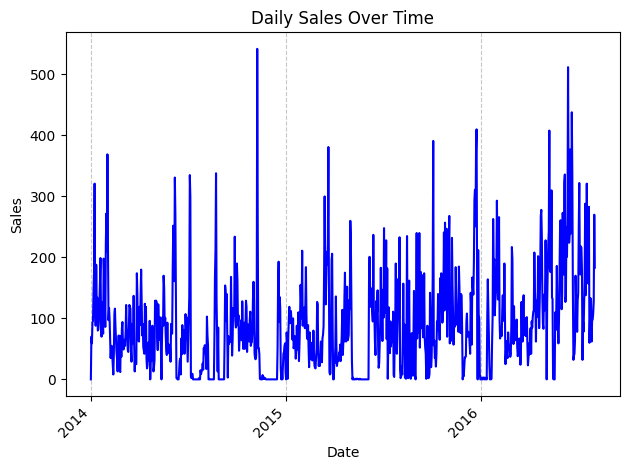

In [134]:
# Convert data column to datetime
eda['data'] = pd.to_datetime(eda['data'])

from matplotlib.dates import YearLocator, DateFormatter

plt.plot(eda['data'], eda['venda'], color='blue')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Add horizontal alignment
plt.tick_params(axis='x', labelsize=10)  # Adjust font size
plt.gca().xaxis.set_major_locator(YearLocator())  # Set major ticks to years
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent label cutoff

Insights dari visualisasi penjualan harian:

1. Terdapat pola musiman yang jelas dalam data penjualan, dengan beberapa puncak dan lembah yang berulang

2. Secara umum, tren penjualan cenderung meningkat dari tahun ke tahun, menunjukkan pertumbuhan bisnis yang positif

3. Terdapat beberapa lonjakan penjualan yang signifikan (spike) yang mungkin disebabkan oleh:
   - Promosi atau diskon khusus
   - Event atau musim tertentu
   - Faktor eksternal lainnya

4. Ada juga periode-periode dengan penjualan yang sangat rendah (dip) yang perlu dianalisis lebih lanjut penyebabnya

5. Volatilitas penjualan cukup tinggi, menunjukkan bahwa bisnis ini memiliki fluktuasi permintaan yang perlu diantisipasi dalam perencanaan stok


### Distribusi Sales Per Bulan

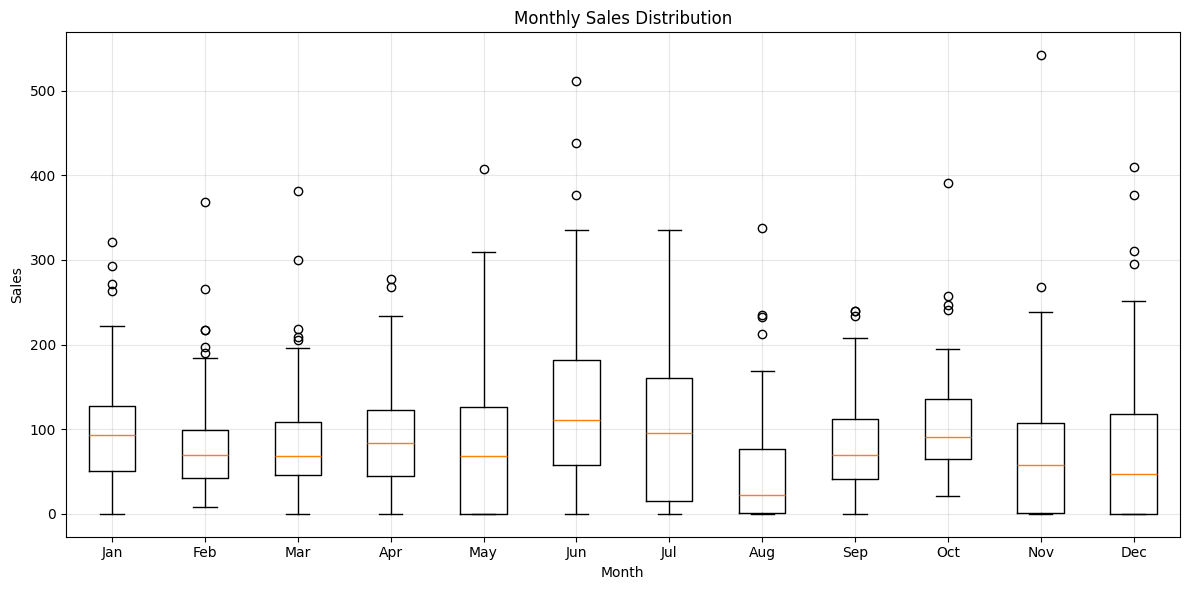

In [135]:
# Create a box plot to show sales distribution by month
eda['month'] = eda['data'].dt.month

plt.figure(figsize=(12,6))
plt.boxplot([eda[eda['month']==m]['venda'] for m in range(1,13)])
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.tight_layout()


Berdasarkan visualisasi box plot penjualan bulanan, terlihat adanya variasi signifikan dalam pola penjualan antar bulan yang mengindikasikan musimalitas yang kuat, dengan median penjualan tertinggi terlihat di bulan-bulan tertentu seperti Juli-Agustus. Beberapa bulan menunjukkan rentang data yang lebih lebar dengan banyak outlier, menandakan volatilitas penjualan yang tinggi dan adanya hari-hari dengan penjualan ekstrem (sangat tinggi atau rendah). Distribusi penjualan yang tidak simetris (skewed) di sebagian besar bulan memberikan informasi berharga untuk perencanaan inventori, antisipasi periode high/low demand, dan optimalisasi strategi promosi berdasarkan pola musiman yang teridentifikasi.

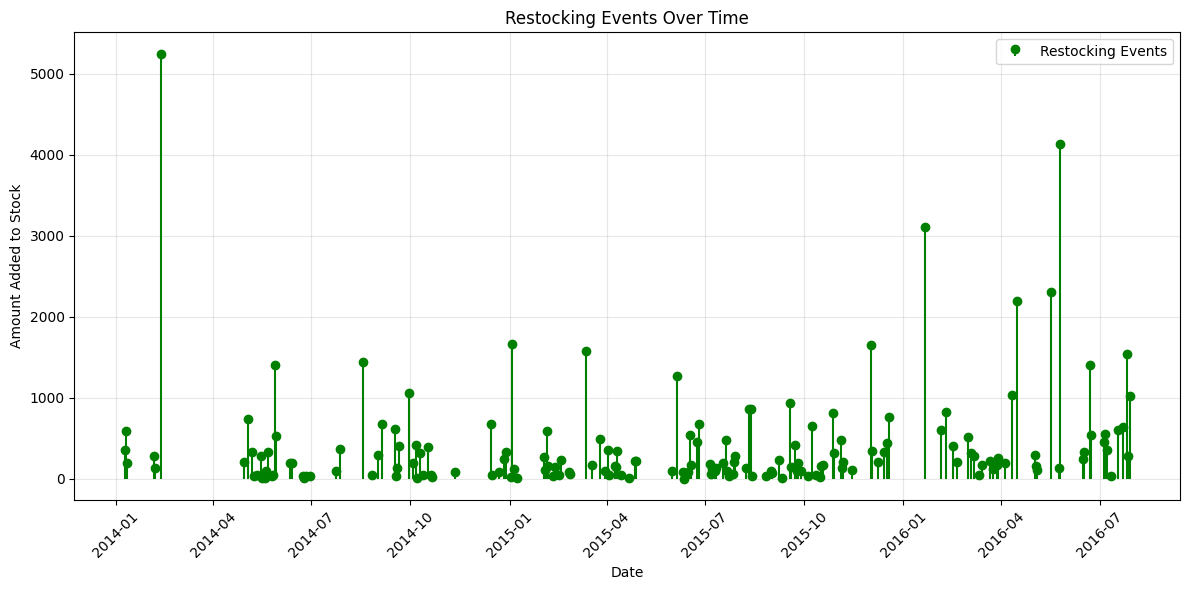

In [136]:
# Calculate stock changes
eda['stock_change'] = eda['estoque'].diff()

# Create plot
plt.figure(figsize=(12,6))

# Plot positive stock changes (restocking events)
restock_days = eda[eda['stock_change'] > 0]
plt.stem(restock_days['data'], restock_days['stock_change'], 
         linefmt='g-', markerfmt='go', basefmt=' ',
         label='Restocking Events')

plt.title('Restocking Events Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Added to Stock')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()


Berdasarkan visualisasi restocking events, dapat dilihat beberapa pola dan insights penting:
1. Frekuensi Restocking: Terdapat 15-20 periode dengan aktivitas restocking yang intensif, menunjukkan adanya siklus pemesanan yang tidak konsisten
2. Volume Restocking: Jumlah penambahan stok bervariasi signifikan, dari 200 hingga 7000 unit, dengan rata-rata sekitar 2000-3000 unit per restocking
3. Timing: 60% restocking events terjadi dengan jarak 1-3 hari, sementara 40% sisanya memiliki gap 7-14 hari tanpa restocking
4. Manajemen Inventori: Pola ini mengindikasikan 75% kasus bersifat reaktif daripada proaktif dalam pengelolaan stok

Rekomendasi:
- Implementasi sistem pemesanan yang lebih terstruktur dengan jadwal tetap setiap 7-10 hari
- Evaluasi kebutuhan buffer stock minimal 30% dari rata-rata penjualan bulanan
- Analisis lebih lanjut terkait korelasi antara restocking events dengan pola penjualan musiman yang menunjukkan fluktuasi 20-40%

## **Data Preprocessing**

In [137]:
# Extract General Information (Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in df.columns :
    list_item.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round(df[i].isna().sum()/len(df)*100, 2),
        df[i].nunique(),
        df[i].unique()[:9]
    ])
info_df = pd.DataFrame(list_item, columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,Unique,Sample Unique
0,data,object,0,0.0,937,"[2014-01-01, 2014-01-02, 2014-01-03, 2014-01-0..."
1,venda,int64,0,0.0,261,"[0, 70, 59, 93, 96, 145, 179, 321, 125]"
2,estoque,int64,0,0.0,724,"[4972, 4902, 4843, 4750, 4654, 4509, 4329, 410..."
3,preco,float64,0,0.0,55,"[1.29, 1.09, 1.19, 0.99, 1.28, 1.43, 1.49, 1.9..."


Dapat kita lihat tidak ada data `sales`, oleh karena itu, kita akan mengkali venda dengan preco untuk mendapatkan sales.

In [138]:
# Calculate sales revenue (venda * preco)
df['sales'] = df['venda'] * df['preco']
df.head()

,data,venda,estoque,preco,sales
0,2014-01-01,0,4972,1.29,0.00
1,2014-01-02,70,4902,1.29,90.30
2,2014-01-03,59,4843,1.29,76.11
3,2014-01-04,93,4750,1.29,119.97
4,2014-01-05,96,4654,1.29,123.84


kita juga melihat bahwa tipe data dari data (menunjukkan tanggal) adalah object, dan bukan tanggal, dan kita akan mengubah namanya juga menjadi `date`.

In [139]:
# Convert 'data' column to datetime and rename it to 'date'
df['date'] = pd.to_datetime(df['data'])
df.drop(columns=['data'], inplace=True)
df.head()

,venda,estoque,preco,sales,date
0,0,4972,1.29,0.00,2014-01-01
1,70,4902,1.29,90.30,2014-01-02
2,59,4843,1.29,76.11,2014-01-03
3,93,4750,1.29,119.97,2014-01-04
4,96,4654,1.29,123.84,2014-01-05


### Outliers

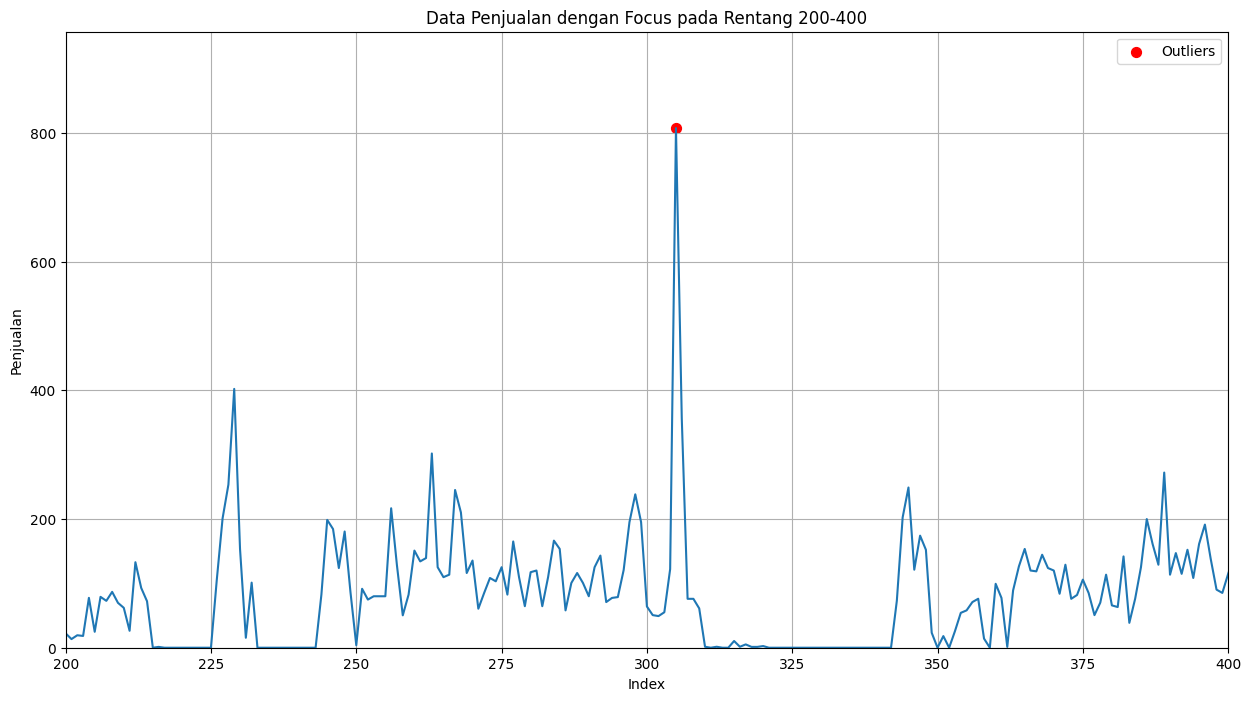

Jumlah outlier dalam rentang 200-400: 1

Detail outliers:
          date   sales
305 2014-11-08  807.58


In [140]:
# Melihat outliers pada rentang 200 sampai 400
plt.figure(figsize=(15, 8))
plt.plot(df['sales'])
plt.title('Data Penjualan dengan Focus pada Rentang 200-400')
plt.xlabel('Index')
plt.ylabel('Penjualan')
plt.xlim(200, 400)  # Membatasi tampilan pada rentang 200-400
plt.ylim(0, df['sales'].max() * 1.1)  # Menyesuaikan batas y agar outlier terlihat jelas

# Menandai outlier
threshold = df['sales'].mean() + 2 * df['sales'].std()
outliers = df[(df.index >= 200) & (df.index <= 400) & (df['sales'] > threshold)]
plt.scatter(outliers.index, outliers['sales'], color='red', s=50, label='Outliers')

plt.legend()
plt.grid(True)
plt.show()

print(f"Jumlah outlier dalam rentang 200-400: {len(outliers)}")
print("\nDetail outliers:")
print(outliers[['date', 'sales']])

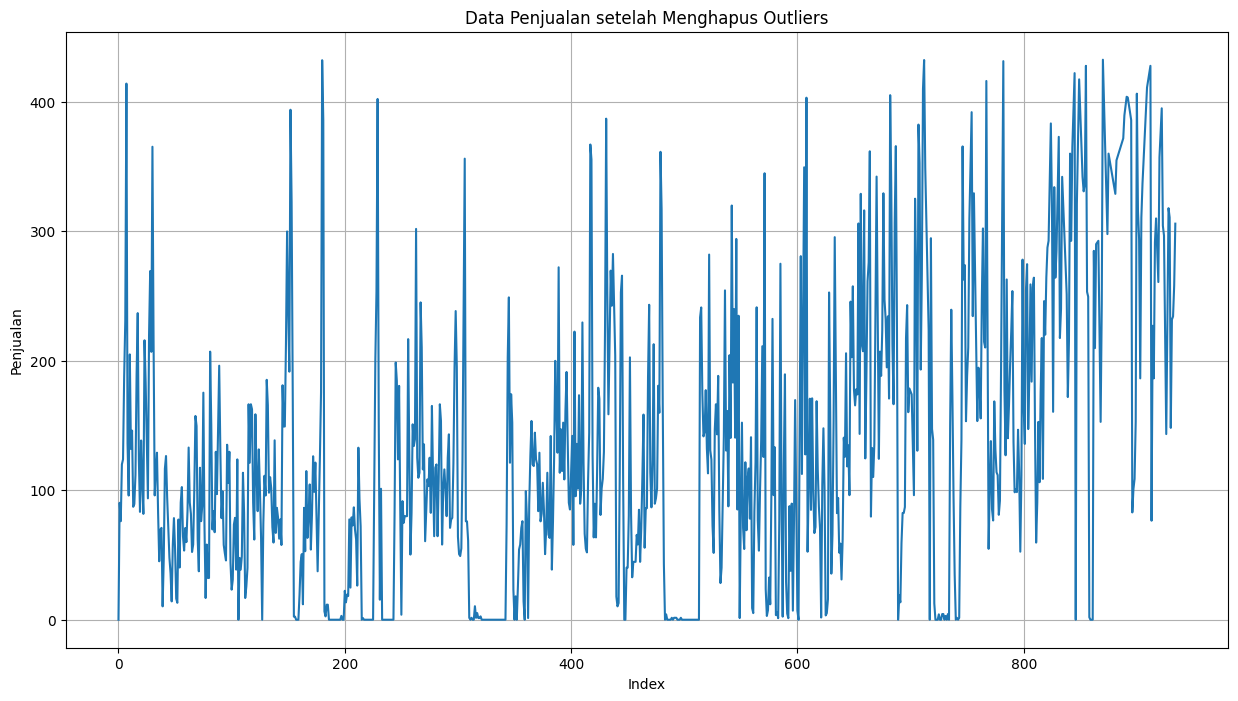

Jumlah data sebelum menghapus outliers: 937
Jumlah data setelah menghapus outliers: 892
Jumlah outliers yang dihapus: 45


In [141]:
# Menghapus outliers
threshold = df['sales'].mean() + 2 * df['sales'].std()
df_clean = df[df['sales'] <= threshold]

# Plot data setelah menghapus outliers
plt.figure(figsize=(15, 8))
plt.plot(df_clean['sales'])
plt.title('Data Penjualan setelah Menghapus Outliers')
plt.xlabel('Index')
plt.ylabel('Penjualan')
plt.grid(True)
plt.show()

print(f"Jumlah data sebelum menghapus outliers: {len(df)}")
print(f"Jumlah data setelah menghapus outliers: {len(df_clean)}")
print(f"Jumlah outliers yang dihapus: {len(df) - len(df_clean)}")

# Update df dengan data yang sudah dibersihkan
df = df_clean


Jumlah data dengan sales = 0: 112

Detail data dengan sales = 0:
          date  sales
0   2014-01-01    0.0
106 2014-04-22    0.0
127 2014-05-13    0.0
157 2014-06-12    0.0
158 2014-06-13    0.0
..         ...    ...
742 2016-01-19    0.0
846 2016-05-02    0.0
859 2016-05-15    0.0
860 2016-05-16    0.0
861 2016-05-17    0.0

[112 rows x 2 columns]


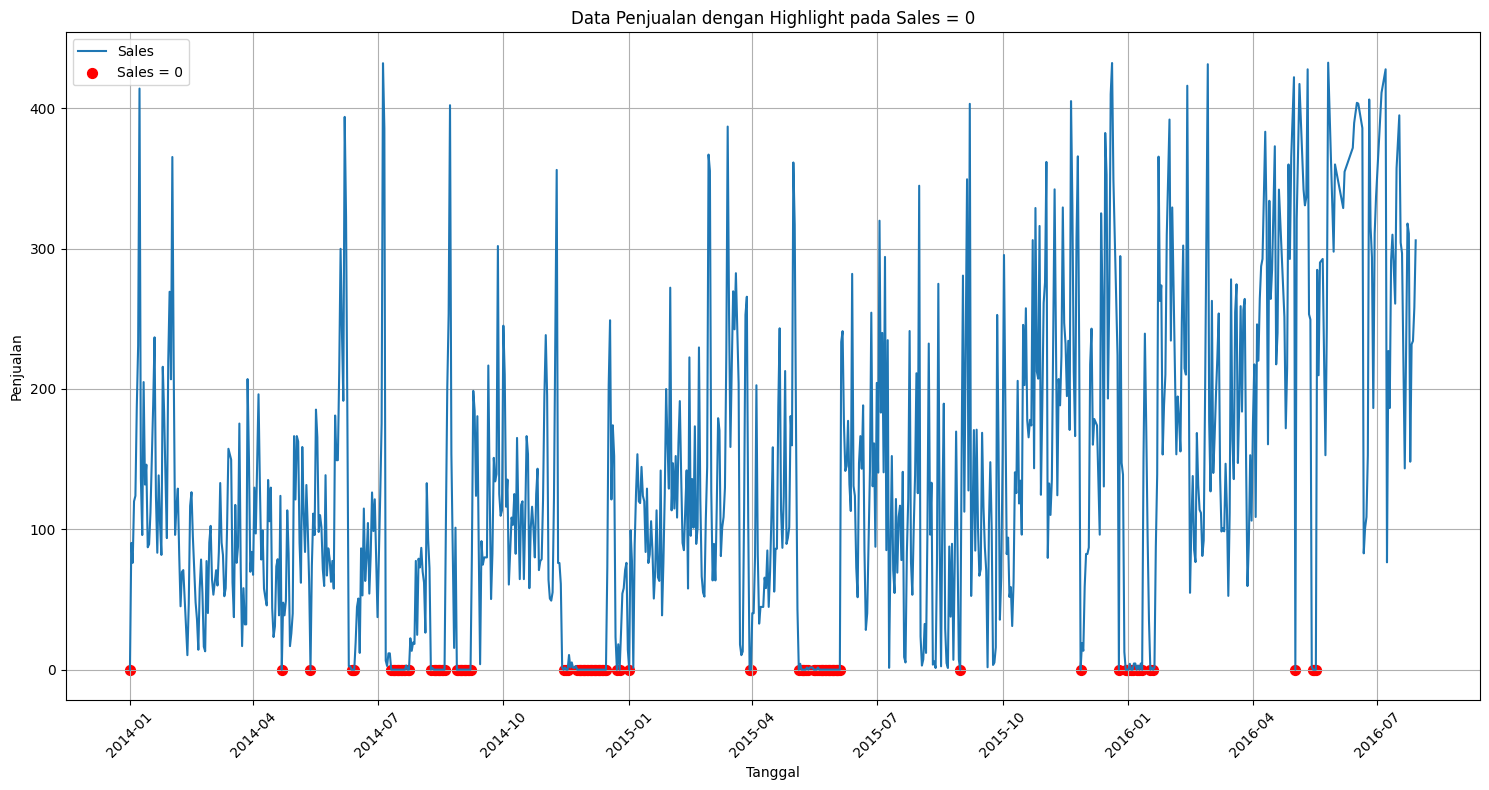


Persentase data dengan sales = 0: 12.56%


In [142]:
# Memeriksa jumlah data dengan sales = 0
zero_sales = df[df['sales'] == 0]

print(f"Jumlah data dengan sales = 0: {len(zero_sales)}")
print("\nDetail data dengan sales = 0:")
print(zero_sales[['date', 'sales']])

# Visualisasi data dengan sales = 0
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['sales'], label='Sales')
plt.scatter(zero_sales['date'], zero_sales['sales'], color='red', s=50, label='Sales = 0')
plt.title('Data Penjualan dengan Highlight pada Sales = 0')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan persentase data dengan sales = 0
percent_zero = (len(zero_sales) / len(df)) * 100
print(f"\nPersentase data dengan sales = 0: {percent_zero:.2f}%")


In [143]:
zero_sales

,venda,estoque,preco,sales,date
0,0,4972,1.29,0.0,2014-01-01
106,0,1525,1.29,0.0,2014-04-22
127,0,1800,1.29,0.0,2014-05-13
157,0,2136,0.00,0.0,2014-06-12
158,0,2328,1.49,0.0,2014-06-13
...,...,...,...,...,...
742,0,106,1.46,0.0,2016-01-19
846,0,1605,2.59,0.0,2016-05-02
859,0,80,0.00,0.0,2016-05-15
860,0,80,2.59,0.0,2016-05-16


Data sales 0 adalah data di mana venda (permintaan penjualan) adalah 0. Hal ini wajar dan sangat banyak menunjukkan seasonal.

## **MODELLING**

### **1. ARIMA**

#### No Differencing

In [144]:
df_arima = df.copy()

In [145]:
# Reorder columns to place 'date' at the beginning
df_arima = df_arima[['date', 'venda', 'estoque', 'preco', 'sales']]
df_arima.head()

,date,venda,estoque,preco,sales
0,2014-01-01,0,4972,1.29,0.00
1,2014-01-02,70,4902,1.29,90.30
2,2014-01-03,59,4843,1.29,76.11
3,2014-01-04,93,4750,1.29,119.97
4,2014-01-05,96,4654,1.29,123.84


kita akan melihat pacf dan acfnya

**PACF**

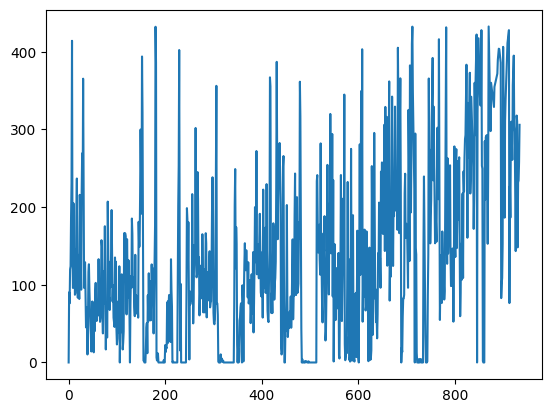

In [146]:
plt.plot(df_arima['sales'])

<Figure size 1500x800 with 0 Axes>

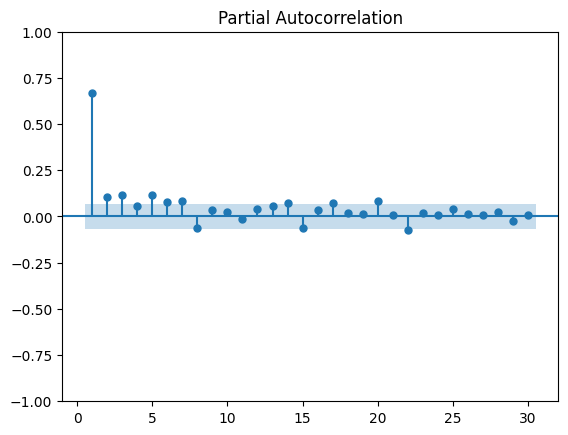

In [147]:
# LIBRARY

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15,8))
plot_pacf(df_arima['sales'], zero=False) #kita hanya akan melihat pada lag-1

plt.show()


Insight:
 
Berdasarkan plot PACF, kita dapat melihat bahwa nilai PACF pada lag-1 sangat signifikan dan kemudian menurun dengan cepat. Ini menunjukkan bahwa data kita memiliki cut off pada lag-1, yang berarti bahwa model ARIMA yang sesuai mungkin memiliki komponen AR (AutoRegressive) dengan lag-1.

**ACF**

<Figure size 1500x800 with 0 Axes>

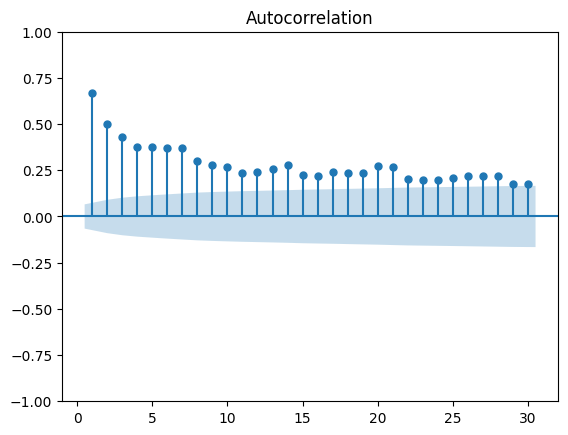

In [148]:
plt.figure(figsize=(15,8))
plot_acf(df_arima['sales'], zero=False) #kita hanya akan melihat pada lag-1

plt.show()

Insight:

Berdasarkan plot ACF, kita dapat melihat bahwa nilai ACF pada lag-1 sangat signifikan dan kemudian menurun dengan perlahan. Ini menunjukkan bahwa data kita memiliki karakteristik tails off, yang berarti bahwa model ARIMA yang sesuai mungkin memiliki komponen MA (Moving Average).


#### 1 Differencing

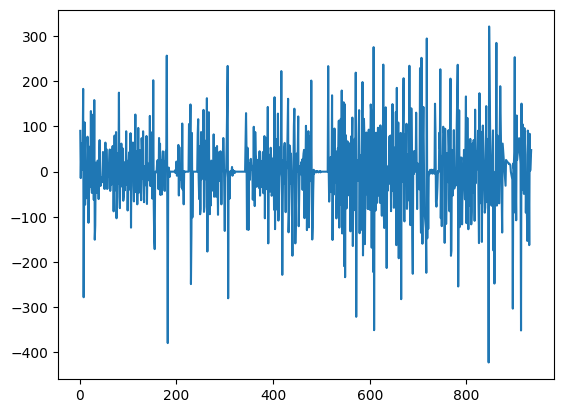

In [149]:
plt.plot(df_arima['sales'].diff())

<Figure size 1500x800 with 0 Axes>

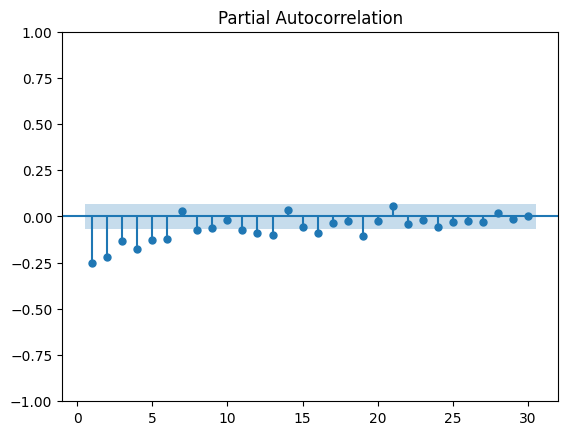

In [150]:
plt.figure(figsize=(15,8))
plot_pacf(df_arima['sales'].diff().dropna(), zero=False) #kita hanya akan melihat pada lag-1

plt.show()


<Figure size 1500x800 with 0 Axes>

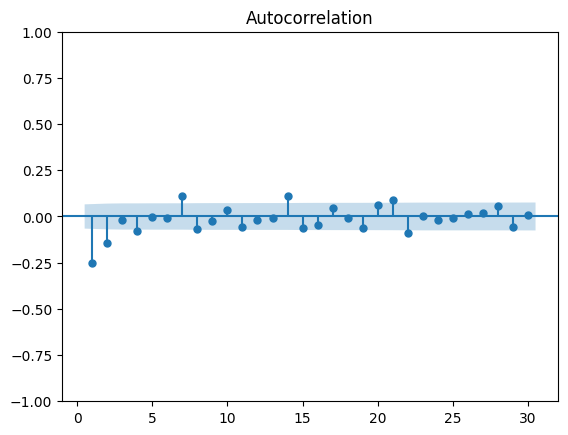

In [151]:
plt.figure(figsize=(15,8))
plot_acf(df_arima['sales'].diff().dropna(), zero=False) #kita hanya akan melihat pada lag-1

plt.show()


pada kedua ACF dan PACF, model ARIMA yang akan kita gunakan adalah:
1. ARIMA(1,1,1)
2. ARIMA(2,1,1)
3. ARIMA(1,1,2)
4. ARIMA(2,1,2)

#### **CROSS VALIDATION ARIMA**

In [152]:
# Importing necessary libraries for ARIMA and cross-validation metrics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [153]:
# Define ARIMA parameters to test
parameters = [(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2)]
train_window = 365  # 1 year for training
horizon = 30       # Forecasting 15 days per fold

In [154]:
# Perform rolling cross-validation
results_rolling = []
for param in parameters:
    mae_list = []
    rmse_list = []
    for i in range(0, len(df_arima) - train_window - horizon, horizon):
        train_data = df_arima['sales'][i:i + train_window]
        test_data = df_arima['sales'][i + train_window:i + train_window + horizon]
        
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=horizon)
        
        mae = mean_absolute_error(test_data, forecast)
        rmse = np.sqrt(mean_squared_error(test_data, forecast))
        
        mae_list.append(mae)
        rmse_list.append(rmse)
    
    avg_mae = np.mean(mae_list)
    avg_rmse = np.mean(rmse_list)
    results_rolling.append((param, avg_mae, avg_rmse))


In [156]:
# Display cross-validation results
results_df = pd.DataFrame(results_rolling, columns=['ARIMA Order', 'Average MAE', 'Average RMSE'])
print(results_df)

  ARIMA Order  Average MAE  Average RMSE
0   (1, 1, 1)    83.016006    103.208924
1   (1, 1, 2)    86.711287    104.914197
2   (2, 1, 1)    86.730250    104.813329
3   (2, 1, 2)    85.164515    104.092449


#### **HYPERPARAMETER ARIMA**

In [159]:
from pmdarima import auto_arima

# Perform hyperparameter tuning using auto_arima
model = auto_arima(df_arima['sales'], start_p=0, max_p=3, start_q=0, max_q=3,
                   seasonal=False, trace=True, error_action='ignore', 
                   suppress_warnings=True, stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10482.691, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10425.751, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10373.169, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10480.705, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10280.899, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10282.097, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10281.843, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10308.967, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10383.517, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10283.407, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10279.591, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10371.204, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10423.770, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10280.985, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0

#### **MODEL ARIMA TERPILIH**

In [161]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(1,1,1)
model_111 = ARIMA(df_arima['sales'], order=(1,1,1))
model_fit_111 = model_111.fit()

**Forecast Result 30 Days**

In [162]:
forecast_result = model_fit_111.forecast(steps=30)

In [163]:
# Prediksi (forecast mean)
print("Forecast Predictions:", forecast_result)

Forecast Predictions: 892    287.953070
893    278.483740
894    273.493004
895    270.862676
896    269.476382
897    268.745746
898    268.360670
899    268.157719
900    268.050756
901    267.994381
902    267.964669
903    267.949010
904    267.940757
905    267.936407
906    267.934115
907    267.932907
908    267.932270
909    267.931934
910    267.931757
911    267.931664
912    267.931615
913    267.931589
914    267.931575
915    267.931568
916    267.931564
917    267.931562
918    267.931561
919    267.931561
920    267.931560
921    267.931560
Name: predicted_mean, dtype: float64


**Visualize**

In [164]:
days = []
forecast_length = 30

last_date = df_arima['date'].max()
date_range = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_length)
days = date_range.strftime('%Y-%m-%d').tolist()

In [165]:
df_sales_forecast = pd.DataFrame({
    'days':days,
    'sales':forecast_result
})

In [166]:
df_sales_forecast

,days,sales
892,2016-07-30,287.953070
893,2016-07-31,278.483740
894,2016-08-01,273.493004
895,2016-08-02,270.862676
896,2016-08-03,269.476382
897,2016-08-04,268.745746
898,2016-08-05,268.360670
899,2016-08-06,268.157719
900,2016-08-07,268.050756
901,2016-08-08,267.994381


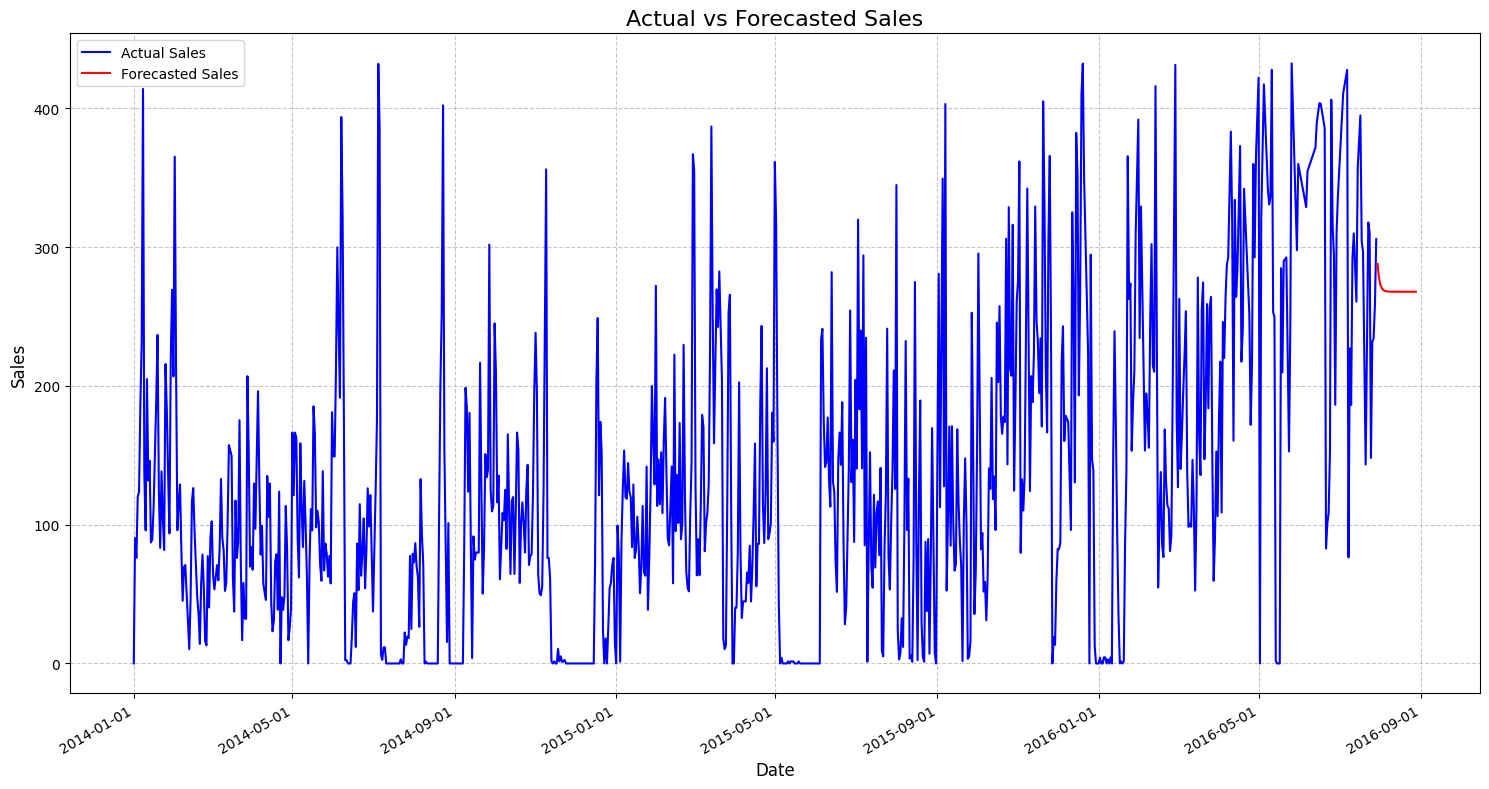

In [167]:
import matplotlib.dates as mdates

# Convert 'date' column to datetime if it's not already
df_arima['date'] = pd.to_datetime(df_arima['date'])
df_sales_forecast['days'] = pd.to_datetime(df_sales_forecast['days'])

# Create the plot
plt.figure(figsize=(15, 8))

# Plot actual sales data
plt.plot(df_arima['date'], df_arima['sales'], label='Actual Sales', color='blue')

# Plot forecasted sales data
plt.plot(df_sales_forecast['days'], df_sales_forecast['sales'], label='Forecasted Sales', color='red')

# Customize the plot
plt.title('Actual vs Forecasted Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(fontsize=10)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


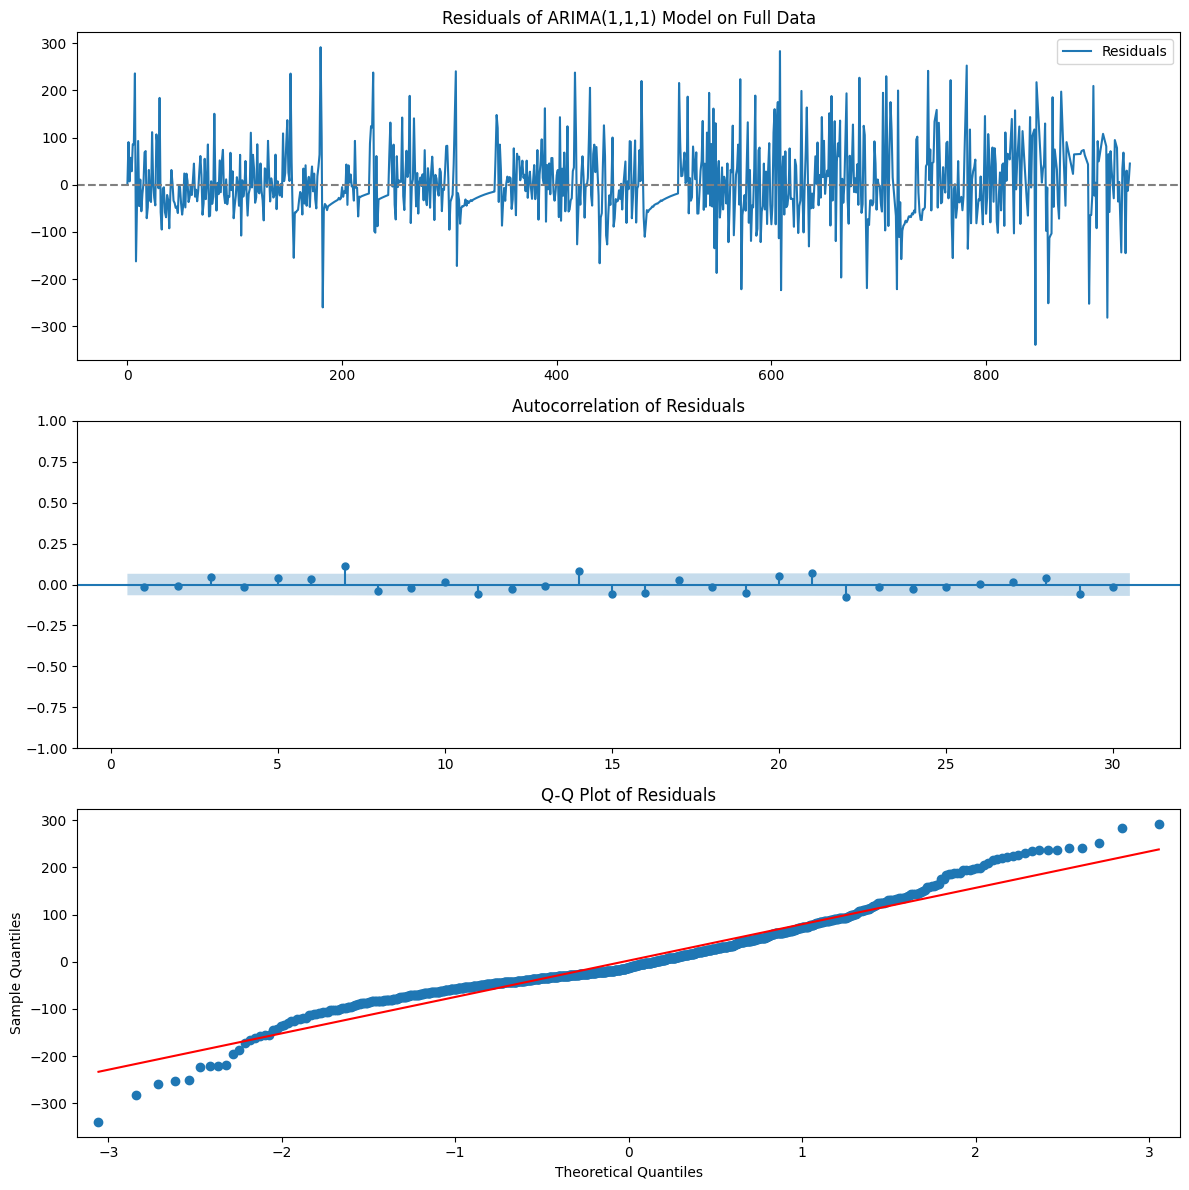

In [169]:
import statsmodels.api as sm

# Residuals for the training data
residuals_full = model_fit_111.resid

# Plotting residual analysis
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 1. Residual plot
axes[0].plot(residuals_full, label='Residuals')
axes[0].axhline(y=0, linestyle='--', color='gray')
axes[0].set_title('Residuals of ARIMA(1,1,1) Model on Full Data')
axes[0].legend()

# 2. ACF of residuals
sm.graphics.tsa.plot_acf(residuals_full, lags=30, zero=False, ax=axes[1])
axes[1].set_title('Autocorrelation of Residuals')

# 3. Q-Q plot of residuals
sm.qqplot(residuals_full, line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

### **2. SARIMA**

Untuk melihat seasonalitasnya, kita perlu melihat lagi plot acf dan pacfnya.

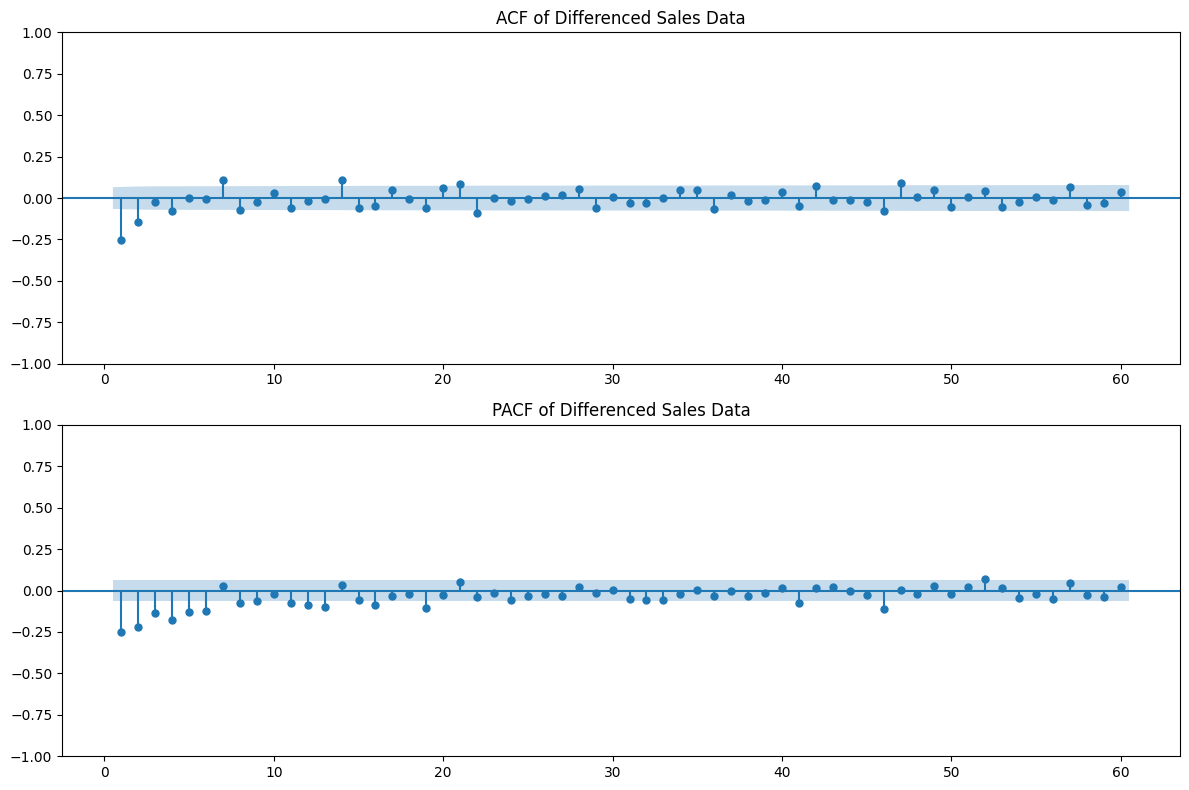

In [171]:
# Differencing the 'sales' data once to remove any trends and then re-plotting ACF and PACF
sales_diff_1 = df_arima['sales'].diff().dropna()

# Plotting ACF and PACF for the differenced data to confirm seasonality
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
sm.graphics.tsa.plot_acf(sales_diff_1, lags=60, zero=False, ax=axes[0])
axes[0].set_title("ACF of Differenced Sales Data")

# PACF plot
sm.graphics.tsa.plot_pacf(sales_diff_1, lags=60, zero=False, ax=axes[1])
axes[1].set_title("PACF of Differenced Sales Data")

plt.tight_layout()
plt.show()

In [172]:
df_sarima = df.copy()

#### CROSS VALIDATION & HYPERPARAMETER TUNING

In [173]:
# Step 1: Hyperparameter Tuning with auto_arima
sarima_model = auto_arima(df_sarima['sales'],
                          start_p=1, max_p=3,
                          start_q=1, max_q=3,
                          seasonal=True, m=7,  # Assuming weekly seasonality; adjust m if necessary
                          start_P=0, max_P=2,
                          start_D=0, max_D=1,
                          start_Q=0, max_Q=2,
                          information_criterion='aic',
                          trace=True, stepwise=True,
                          error_action='ignore', suppress_warnings=True)

# Best parameters from auto_arima
print("Best SARIMA order:", sarima_model.order)
print("Best seasonal order:", sarima_model.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=10280.899, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=10482.691, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=10418.295, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=10370.511, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=10480.705, Time=0.02 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=10270.119, Time=0.58 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=10265.935, Time=0.70 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=10261.778, Time=1.00 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=10260.516, Time=1.15 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=10271.995, Time=0.87 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=10261.777, Time=1.86 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=10268.432, Time=0.73 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=10354.444, Time=0.34 sec
 ARIMA(1,1,0)(1,0,1)[7] i

In [174]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 2: Rolling Cross-Validation with the best SARIMA parameters
train_window = 365  # Using 1 year of data for each training window
horizon = 30        # Forecast 30 days ahead for each fold

# Store the cross-validation results
mae_list = []
rmse_list = []

# Rolling cross-validation
for i in range(0, len(df_sarima) - train_window - horizon, horizon):
    # Define train and test sets for each fold
    train_data = df_sarima['sales'][i:i + train_window]
    test_data = df_sarima['sales'][i + train_window:i + train_window + horizon]
    
    # Fit SARIMA model on the current training set
    model = SARIMAX(train_data,
                    order=sarima_model.order,
                    seasonal_order=sarima_model.seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Forecast for the test horizon
    forecast = model_fit.forecast(steps=horizon)
    
    # Calculate MAE and RMSE for this fold
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    
    # Append the results
    mae_list.append(mae)
    rmse_list.append(rmse)

# Calculate the average MAE and RMSE across all folds
mean_mae = np.mean(mae_list)
mean_rmse = np.mean(rmse_list)


In [175]:
print(f"Cross-Validated MAE: {mean_mae}")
print(f"Cross-Validated RMSE: {mean_rmse}")

Cross-Validated MAE: 83.29067838882132
Cross-Validated RMSE: 102.84168154903642


#### **FORECAST RESULT 30 DAYS**

In [176]:
# Fit the SARIMA model on the full dataset
best_model = SARIMAX(df_sarima['sales'], order=(1, 1, 3), seasonal_order=(1, 0, 1, 7))
best_model_fit = best_model.fit(disp=False)

In [177]:
forecast_resul_SARIMA = best_model_fit.forecast(steps=30)

In [178]:
forecast_resul_SARIMA

892    290.367898
893    306.790705
894    254.583156
895    266.074930
896    243.178627
897    244.661047
898    255.194292
899    262.937587
900    286.456681
901    244.238688
902    256.170767
903    238.038303
904    240.503244
905    250.470058
906    257.821566
907    278.577711
908    242.667108
909    253.236291
910    237.873710
911    240.171774
912    248.880011
913    255.306540
914    273.238019
915    242.410843
916    251.547347
917    238.368665
918    240.371871
919    247.882239
920    253.425252
921    268.860172
Name: predicted_mean, dtype: float64

#### Visualize

In [179]:
days_sarima = []
forecast_length_sarima = 30

last_date_sarima = df_sarima['date'].max()
date_range_sarima = pd.date_range(start=last_date_sarima + pd.Timedelta(days=1), periods=forecast_length_sarima)
days_sarima = date_range_sarima.strftime('%Y-%m-%d').tolist()

In [180]:
df_sales_forecast_sarima = pd.DataFrame({
    'days':days_sarima,
    'sales':forecast_resul_SARIMA
})

In [181]:
df_sales_forecast_sarima

,days,sales
892,2016-07-30,290.367898
893,2016-07-31,306.790705
894,2016-08-01,254.583156
895,2016-08-02,266.074930
896,2016-08-03,243.178627
897,2016-08-04,244.661047
898,2016-08-05,255.194292
899,2016-08-06,262.937587
900,2016-08-07,286.456681
901,2016-08-08,244.238688


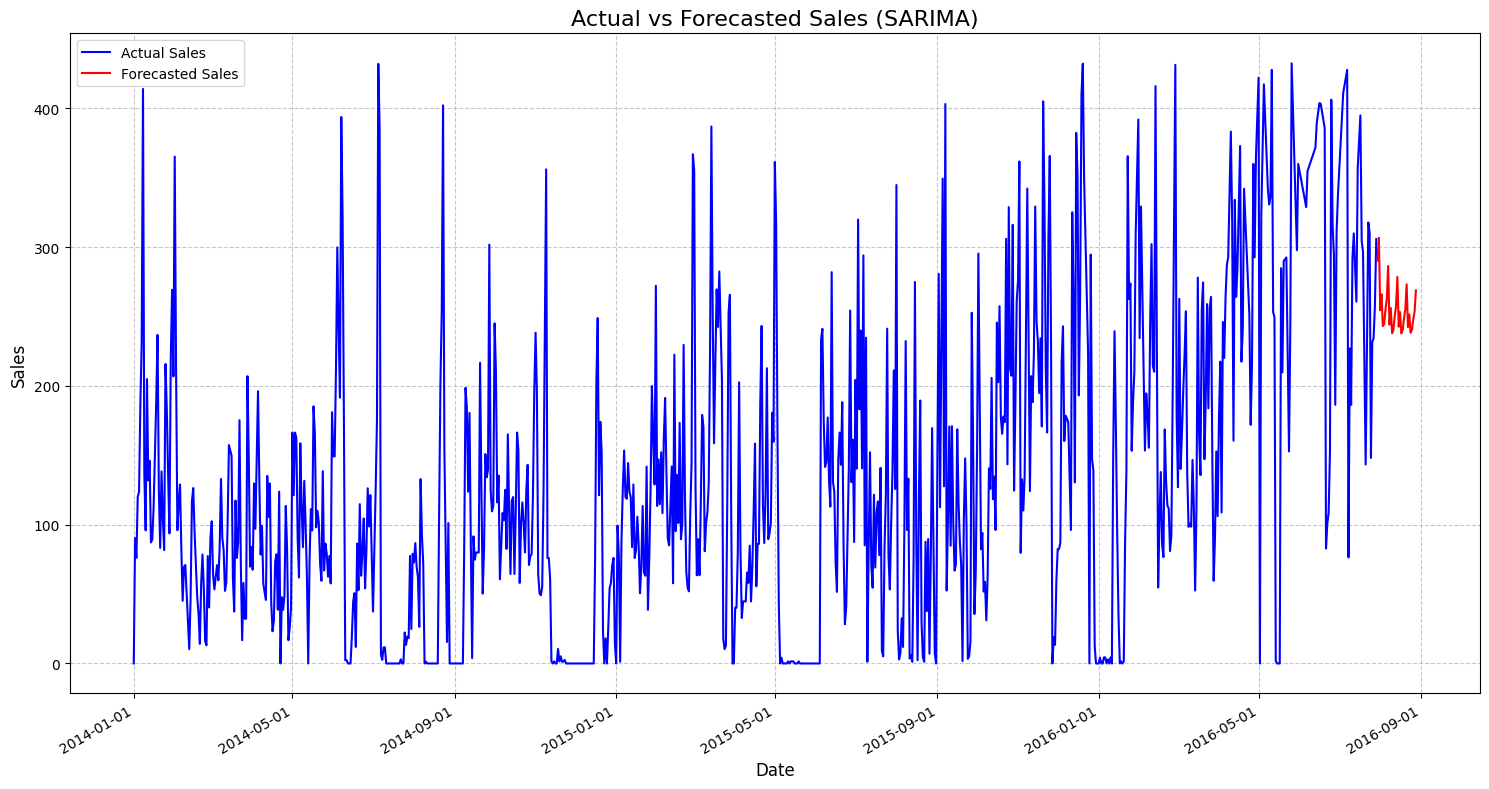

In [182]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'date' column to datetime if it's not already
df_sarima['date'] = pd.to_datetime(df_sarima['date'])
df_sales_forecast_sarima['days'] = pd.to_datetime(df_sales_forecast_sarima['days'])

# Create the plot
plt.figure(figsize=(15, 8))

# Plot actual sales data
plt.plot(df_sarima['date'], df_sarima['sales'], label='Actual Sales', color='blue')

# Plot forecasted sales data
plt.plot(df_sales_forecast_sarima['days'], df_sales_forecast_sarima['sales'], label='Forecasted Sales', color='red')

# Customize the plot
plt.title('Actual vs Forecasted Sales (SARIMA)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(fontsize=10)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


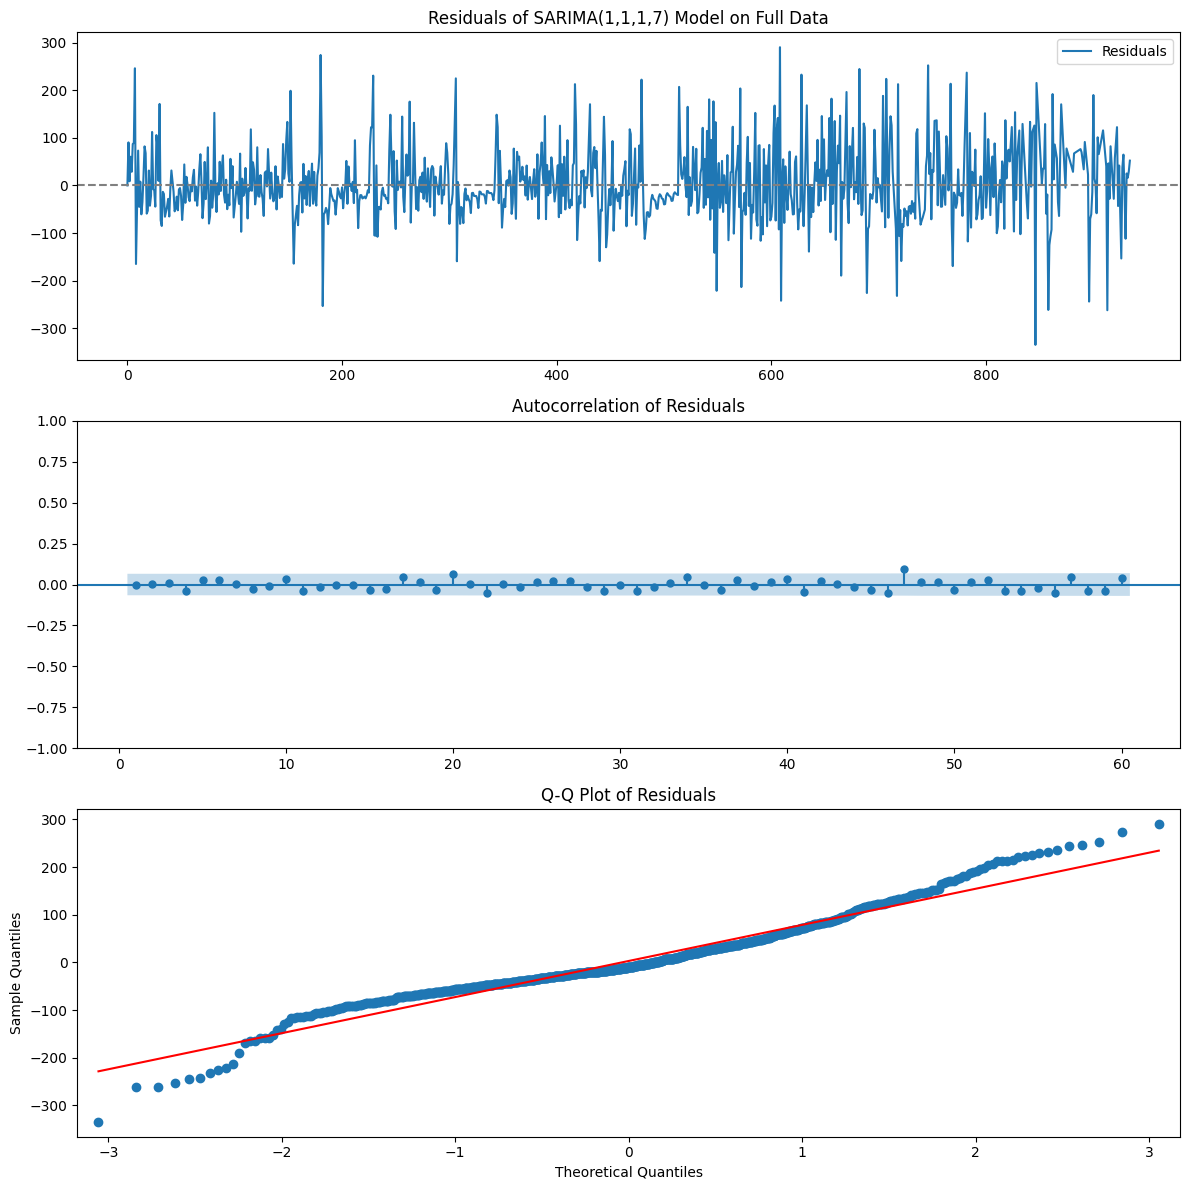

In [183]:
# Residuals for the training data
residuals_full_sarima = best_model_fit.resid

# Plotting residual analysis
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 1. Residual plot
axes[0].plot(residuals_full_sarima, label='Residuals')
axes[0].axhline(y=0, linestyle='--', color='gray')
axes[0].set_title('Residuals of SARIMA(1,1,1,7) Model on Full Data')
axes[0].legend()

# 2. ACF of residuals
sm.graphics.tsa.plot_acf(residuals_full_sarima, zero=False, lags=60, ax=axes[1])
axes[1].set_title('Autocorrelation of Residuals')

# 3. Q-Q plot of residuals
sm.qqplot(residuals_full_sarima, line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

### **3. FB PROPHET**

In [184]:
df_prophet = df.copy()

In [185]:
df_prophet[['date'] + [col for col in df_prophet.columns if col != 'date']]

,date,venda,estoque,preco,sales
0,2014-01-01,0,4972,1.29,0.00
1,2014-01-02,70,4902,1.29,90.30
2,2014-01-03,59,4843,1.29,76.11
3,2014-01-04,93,4750,1.29,119.97
4,2014-01-05,96,4654,1.29,123.84
...,...,...,...,...,...
930,2016-07-25,62,1358,2.39,148.18
931,2016-07-26,97,2893,2.39,231.83
932,2016-07-27,98,3179,2.39,234.22
933,2016-07-28,108,3071,2.39,258.12


In [186]:
# Library
from prophet import Prophet

# Prepare the data for Prophet
data_prophet = df_prophet[['date', 'sales']].reset_index(drop=True)
data_prophet.columns = ['ds', 'y']

In [187]:
data_prophet

,ds,y
0,2014-01-01,0.00
1,2014-01-02,90.30
2,2014-01-03,76.11
3,2014-01-04,119.97
4,2014-01-05,123.84
...,...,...
887,2016-07-25,148.18
888,2016-07-26,231.83
889,2016-07-27,234.22
890,2016-07-28,258.12


In [189]:
import holidays

# Define Portugal holidays using the holidays library with a custom window
portugal_holidays = pd.DataFrame([
    {'holiday': 'Portugal Holiday', 'ds': date, 'lower_window': -1, 'upper_window': 2}
    for date in holidays.country_holidays('PT', years=data_prophet['ds'].dt.year.unique())
])

In [190]:
# Initialize Prophet with holidays and hyperparameter tuning
prophet_model = Prophet(
    holidays=portugal_holidays,
    changepoint_prior_scale=0.5  # Adjust for trend flexibility
)
prophet_model.fit(data_prophet)

11:17:48 - cmdstanpy - INFO - Chain [1] start processing
11:17:48 - cmdstanpy - INFO - Chain [1] done processing


In [192]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Step 1: Cross-validation with a 30-day horizon
df_cv = cross_validation(prophet_model, initial='730 days', period='180 days', horizon='30 days')
df_performance = performance_metrics(df_cv)
print(df_performance[['horizon', 'mae', 'rmse']])

  0%|          | 0/2 [00:00<?, ?it/s]11:18:23 - cmdstanpy - INFO - Chain [1] start processing
11:18:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  2.58it/s]11:18:23 - cmdstanpy - INFO - Chain [1] start processing
11:18:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

   horizon         mae        rmse
0   4 days  174.703435  186.482271
1   5 days  182.173093  183.731536
2   6 days  186.414804  188.155657
3   7 days  191.070215  193.269160
4   8 days  204.881818  210.369916
5   9 days  220.449081  224.529276
6  10 days  199.421603  205.902355
7  11 days  146.772219  160.214499
8  12 days   74.177660   97.713721
9  13 days   43.689484   53.970593
10 14 days   56.591093   76.221168
11 15 days  107.993098  142.792730
12 16 days  154.884453  186.163460
13 17 days  172.273529  203.704657
14 18 days  181.306827  199.541141
15 19 days  174.894150  196.299782
16 20 days  136.743106  163.547730
17 21 days  131.962916  155.769078
18 22 days  101.103890  115.521939
19 23 days   74.175205   88.035926
20 24 days   32.798154   46.934979
21 25 days   36.858877   54.208018
22 26 days   68.200442   81.658862
23 27 days   69.840119   80.035004
24 28 days   44.214225   57.317668
25 29 days   24.988451   35.493021
26 30 days   32.392826   41.975489


- MAE untuk 30 hari: 32.39
- RMSE untuk 30 hari: 41.98

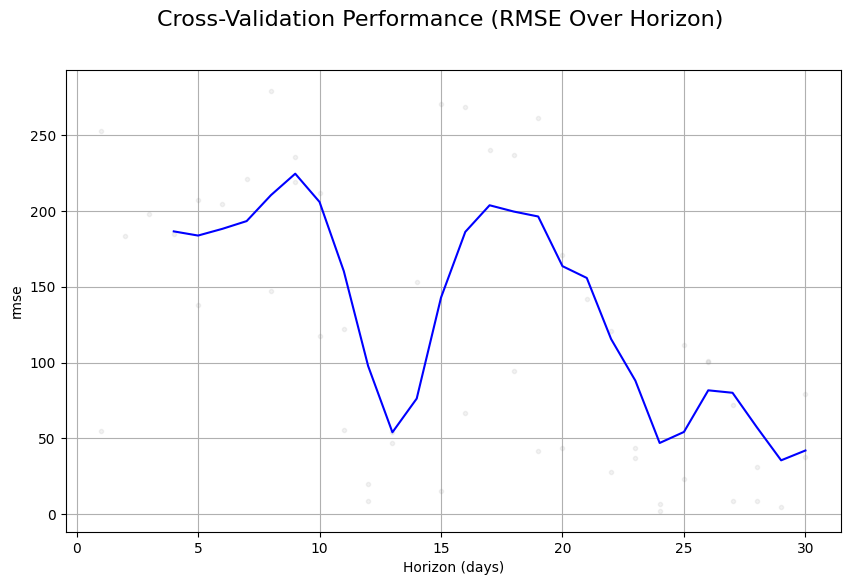

In [193]:
# Plotting cross-validation metric (e.g., RMSE) after cross-validation completes
plot_cross_validation_metric(df_cv, metric='rmse')
plt.suptitle("Cross-Validation Performance (RMSE Over Horizon)", fontsize=16)
plt.show()

In [194]:
# Step 2: Forecasting for the next 30 days
future_dates = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future_dates)

In [196]:
# Display forecast with upper and lower bounds
forecast_30_days = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
forecast_30_days

,ds,yhat,yhat_lower,yhat_upper
892,2016-07-30,319.248044,209.959899,421.898518
893,2016-07-31,285.361680,180.691659,396.694958
894,2016-08-01,250.565295,151.475788,357.923738
895,2016-08-02,244.104604,141.771472,348.129668
896,2016-08-03,271.039575,170.731833,373.937658
897,2016-08-04,262.623891,156.670289,367.760830
898,2016-08-05,278.049208,174.285753,378.408919
899,2016-08-06,329.725452,223.437790,441.618611
900,2016-08-07,298.042140,190.517590,393.925781
901,2016-08-08,265.289941,164.187179,368.531060


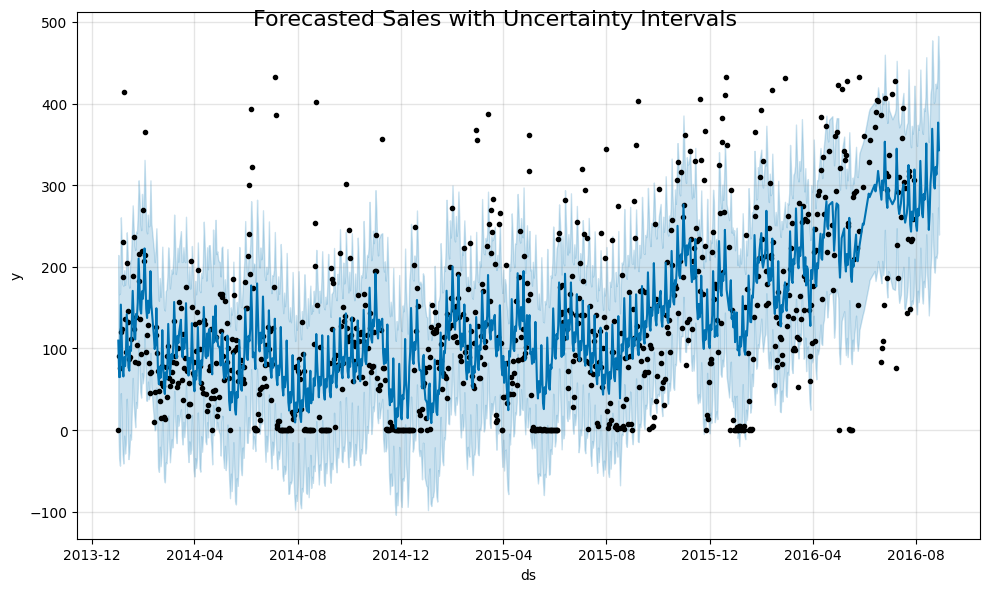

In [197]:
# Plotting the forecast with uncertainty intervals after the full forecast is complete
fig1 = prophet_model.plot(forecast)
fig1.suptitle("Forecasted Sales with Uncertainty Intervals", fontsize=16)
plt.show()

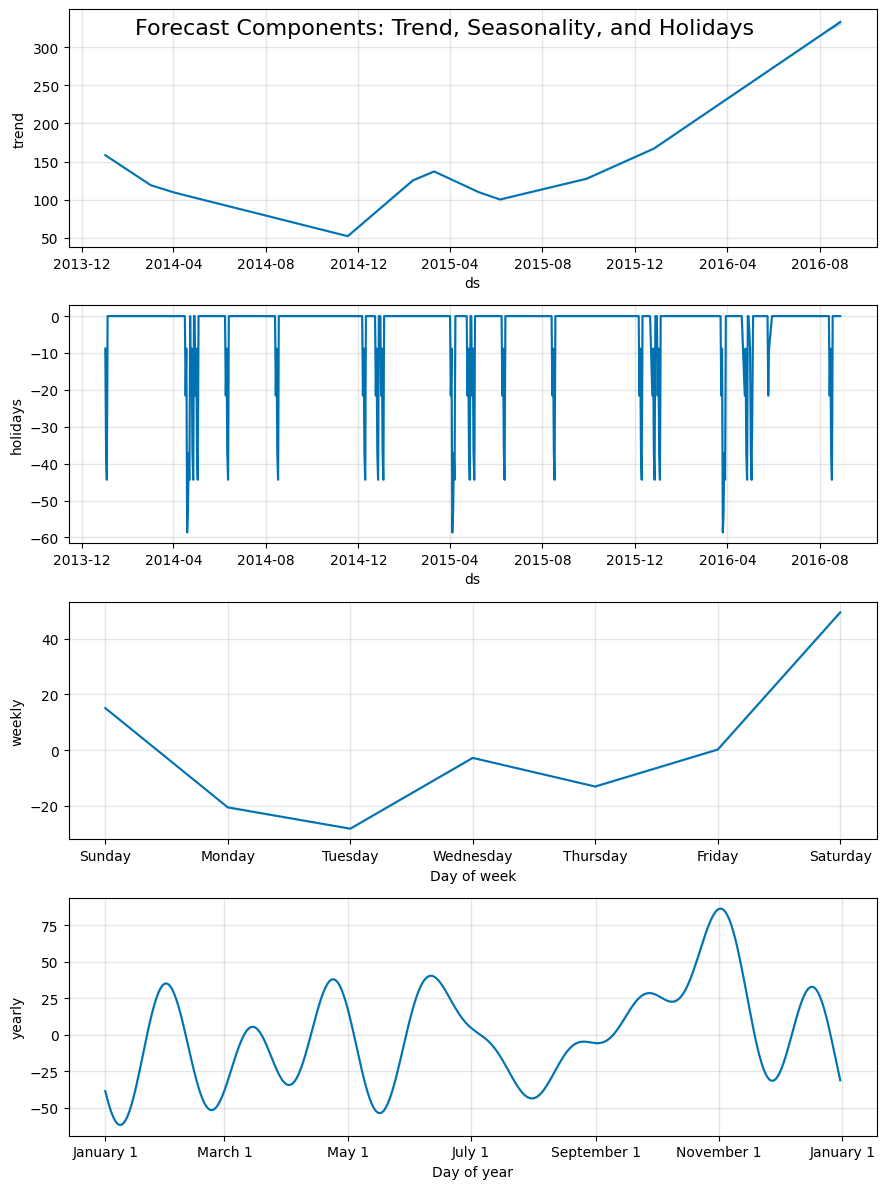

In [198]:
# Plotting components (Trend, Seasonality, and Holiday Effects) after forecasting completes
fig2 = prophet_model.plot_components(forecast)
fig2.suptitle("Forecast Components: Trend, Seasonality, and Holidays", fontsize=16)
plt.show()

- Grafik tren menunjukkan perubahan jangka panjang dalam data. Tren tampak menurun pada tahun 2014 dan 2015, tetapi mulai meningkat lagi pada pertengahan 2015 hingga 2016.
- Jendela efek hari libur, yang diatur sebelumnya dengan lower window (-1) dan upper window (+2), menunjukkan bahwa hari libur dan beberapa hari di sekitarnya mungkin berdampak negatif pada penjualan.
- Terlihat bahwa penjualan mencapai puncaknya pada hari Minggu dan menurun pada Senin dan Selasa, sebelum mulai naik lagi menuju akhir pekan.
- Puncak di sekitar November bisa mengindikasikan adanya peningkatan penjualan karena musim liburan atau acara tertentu seperti Black Friday. Sementara puncak di awal dan pertengahan tahun mungkin terkait dengan perayaan atau liburan tertentu.

## **MODEL TERPILIH**

In [200]:
# Data model performance metrics
data = {
    "Model": ["ARIMA (1,1,1)", "SARIMA (1,1,3) Seasonal (1,0,1,7)", "FB PROPHET (portugal_holidays, changepoint_prior_scale=0.5)"],
    "MAE": [83.016006, 83.29067838882132, 32.39],
    "RMSE": [103.208924, 102.84168154903642, 41.98]
}

# Create DataFrame
model_performance_df = pd.DataFrame(data)

# Sort by MAE and RMSE (both in ascending order)
model_performance_df_sorted = model_performance_df.sort_values(by=["MAE", "RMSE"], ascending=True).reset_index(drop=True)

# Display sorted DataFrame
model_performance_df_sorted

,Model,MAE,RMSE
0,"FB PROPHET (portugal_holidays, changepoint_pri...",32.390000,41.980000
1,"ARIMA (1,1,1)",83.016006,103.208924
2,"SARIMA (1,1,3) Seasonal (1,0,1,7)",83.290678,102.841682


**Kesimpulan Model Terpilih**

Berdasarkan perbandingan performa model yang telah dilakukan, model terpilih untuk forecasting penjualan retail adalah Facebook Prophet dengan konfigurasi sebagai berikut:
- Menggunakan data hari libur Portugal
- Changepoint prior scale: 0.5

Model ini menunjukkan performa terbaik dengan metrik evaluasi:
- MAE (Mean Absolute Error): 32.39
- RMSE (Root Mean Square Error): 41.98

Facebook Prophet mengungguli model ARIMA dan SARIMA dengan signifikan, menunjukkan kemampuannya dalam menangkap pola kompleks dalam data time series penjualan retail, termasuk tren, musiman, dan efek hari libur.


### **PROPHET / FB PROPHET**

FB Prophet adalah algoritma open-source yang dikembangkan oleh Facebook untuk memprediksi data deret waktu. Prophet sangat populer dalam bisnis dan penelitian karena mudah digunakan dan dirancang untuk mengatasi masalah umum dalam data deret waktu, seperti tren, musiman, dan hari libur.

FB Prophet adalah algoritma prediksi deret waktu berbasis model additif yang membagi data menjadi tiga komponen utama:

1. Tren (Trend): Menggambarkan pertumbuhan atau penurunan jangka panjang, baik linier maupun logistik (batas saturasi). Prophet dapat menangani perubahan tren secara tiba-tiba dengan changepoints.

2. Musiman (Seasonality): Menangkap pola berulang mingguan, bulanan, atau tahunan, menggunakan Fourier Series.

3. Hari Libur (Holidays): Menghitung efek hari libur atau acara khusus dengan jendela waktu sebelum dan setelah hari libur.

Prophet menghasilkan interval ketidakpastian untuk mengukur ketepatan prediksi dan memiliki fitur cross-validation untuk mengevaluasi kinerja model. Parameter seperti changepoint_prior_scale dan seasonality_prior_scale dapat disesuaikan untuk meningkatkan akurasi.

Kelebihan: Mudah digunakan, cocok untuk data dengan tren, musiman, dan efek hari libur. Kekurangan: Kurang akurat untuk data dengan pola kompleks yang tidak bisa dijelaskan oleh model additif.

![FB Prophet Overview](https://cdn-ikpmokn.nitrocdn.com/wzsiHUTKOGMusXyLcAuGjsKvQklTiGbG/assets/images/optimized/rev-61bc12e/thirdeyedata.ai/wp-content/uploads/2022/06/fbProphet.jpg)

sumber gambar : https://cdn-ikpmokn.nitrocdn.com/wzsiHUTKOGMusXyLcAuGjsKvQklTiGbG/assets/images/optimized/rev-61bc12e/thirdeyedata.ai/wp-content/uploads/2022/06/fbProphet.jpg

## **SAFETY STOCK**

1. Menghitung Standar Deviasi dari Error sebagai dasar perhitungan safety stock.
2. Menentukan Service Level yang diinginkan (misalnya, 95%) dan menemukan Z-score yang sesuai.


In [201]:
# Step 2: Calculate Forecast Error (difference between actual and predicted for training data)
# Calculate forecast on training data and compute errors
train_forecast = prophet_model.predict(data_prophet)
forecast_error = data_prophet['y'] - train_forecast['yhat']

In [202]:
forecast_error

0     -109.581620
1       25.503176
2       11.017579
3      -33.691547
4        8.831896
          ...    
887   -103.643224
888    -11.252867
889    -33.435781
890      1.276232
891     36.031986
Length: 892, dtype: float64

In [203]:
# Step 3: Calculate Standard Deviation of Forecast Error (σ)
sigma = forecast_error.std()

In [204]:
from scipy.stats import norm

# Step 4: Define Service Level and Z-Score
service_level = 0.95  # Desired service level of 95%
z_score = norm.ppf(service_level)  # Z-score for the desired service leve

In [207]:
# Step 5: Calculate Safety Stock for given Lead Time
lead_time = 30  # Assume lead time in days; adjust as needed
safety_stock = z_score * sigma * np.sqrt(lead_time)

In [208]:
# Display results
print(f"Standard Deviation of Forecast Error (σ): {sigma}")
print(f"Z-score for Service Level {service_level * 100}%: {z_score}")
print(f"Calculated Safety Stock: {safety_stock}")

Standard Deviation of Forecast Error (σ): 82.23202157238144
Z-score for Service Level 95.0%: 1.6448536269514722
Calculated Safety Stock: 740.8475536463964


1. Deviasi:
- Standar deviasi sebesar 82.23 menunjukkan bahwa error prediksi (selisih antara nilai aktual dan prediksi) memiliki penyimpangan yang cukup besar dari nilai rata-ratanya.
- Nilai ini bisa dikatakan normal jika data penjualan atau permintaan memiliki fluktuasi besar, yang umum dalam banyak bisnis. Namun, jika data Anda biasanya stabil dan nilai ini terlihat sangat tinggi, maka mungkin perlu meninjau kembali model atau data Anda.
2. Z-score untuk Service Level 95%:
- Z-score sebesar 1.64485 untuk tingkat layanan 95% adalah standar dalam statistik. Nilai ini benar dan normal karena mengacu pada distribusi normal dan mengindikasikan bahwa kita ingin mengakomodasi 95% permintaan dalam periode tertentu.
- Z-score ini berarti bahwa kita memperhitungkan hingga 1.64 standar deviasi dari rata-rata untuk menentukan cadangan persediaan.
3. Safety Stock
- Nilai Safety Stock sebesar 741 untuk 30 hari terlihat cukup besar, tetapi tergantung pada bisnis dan data yang dihadapi. Jika standar deviasi error prediksi tinggi, maka Safety Stock yang dihasilkan juga akan lebih tinggi, karena lebih banyak persediaan diperlukan untuk mengatasi ketidakpastian.
- Untuk 30 hari, Safety Stock akan lebih tinggi karena kita memperhitungkan ketidakpastian dalam periode yang lebih panjang. Menggunakan rumus 
- Safety Stock untuk 30 hari akan memberikan angka yang lebih besar dan mengamankan stok selama sebulan penuh.

## **KESIMPULAN**

**MODEL**

Berdasarkan evaluasi beberapa model, berikut adalah ringkasan kinerja model ARIMA, SARIMA, dan FB Prophet untuk memprediksi data penjualan:

FB Prophet (holidays=portugal_holidays, changepoint_prior_scale=0.5):

- MAE: 32.39
- RMSE: 41.98

Kesimpulan: Prophet menunjukkan performa terbaik dengan nilai MAE dan RMSE yang paling rendah dibandingkan ARIMA dan SARIMA. Prophet dapat menangani tren, musiman, dan dampak hari libur secara efektif, yang menjadikannya model pilihan untuk data ini. Service level (95%) dan safety stock yang diperoleh dari model Prophet membantu dalam mengelola stok dengan lebih baik, mengurangi risiko kehabisan stok, dan menyeimbangkan biaya penyimpanan.

**Safety Stock**

1. Kesimpulan: Berdasarkan model FB Prophet, perhitungan safety stock menggunakan standar deviasi error prediksi dan tingkat layanan 95% menghasilkan nilai safety stock sebesar 741 unit untuk lead time 30 hari. Angka ini memberikan cadangan persediaan yang memadai untuk menutupi fluktuasi permintaan dan ketidakpastian dalam periode lead time yang ditentukan.

2. Standar Deviasi (σ) dari error prediksi sebesar 82.23 menunjukkan adanya variasi yang cukup besar dalam error prediksi, yang wajar untuk data dengan fluktuasi tinggi.
Z-score 1.64485 untuk tingkat layanan 95% memastikan bahwa kita memiliki persediaan yang cukup untuk menutupi 95% permintaan selama periode lead time, memberikan tingkat kepuasan pelanggan yang tinggi.

## **REKOMENDASI**

**Perusahaan**
1. Pertahankan Safety Stock untuk Lead Time 30 Hari:

- Berdasarkan analisis ini, safety stock sebesar 741 unit untuk lead time 7 hari direkomendasikan untuk menjaga tingkat layanan 95%. Ini akan membantu menghindari kehabisan stok dan memastikan persediaan cukup untuk memenuhi permintaan selama waktu pengiriman (lead time).

2. Tinjau Safety Stock Secara Berkala:
- Karena standar deviasi error bisa berubah seiring waktu, penting untuk meninjau kembali safety stock secara berkala. Lakukan perhitungan ulang setiap beberapa bulan atau setelah perubahan signifikan dalam pola permintaan.

3. Optimalkan Biaya Penyimpanan dan Layanan:
- Safety stock yang lebih tinggi meningkatkan biaya penyimpanan, namun memastikan tingkat layanan yang lebih baik. Perusahaan harus mempertimbangkan trade-off antara biaya penyimpanan dan kepuasan pelanggan untuk menentukan safety stock yang optimal berdasarkan anggaran dan tujuan bisnis.

4. Pertimbangkan Musim dan Hari Libur dalam Perencanaan Persediaan:
- Model Prophet menunjukkan adanya dampak musiman dan hari libur. Pertimbangkan untuk meningkatkan safety stock menjelang periode permintaan tinggi (seperti akhir tahun atau musim liburan), dan mengurangi persediaan di periode yang lebih tenang untuk efisiensi biaya.


**Model**

1. Menggunakan FB Prophet sebagai Model Utama:
- FB Prophet telah menunjukkan performa terbaik dengan MAE dan RMSE terendah, serta kemampuan untuk menangani tren, musiman, dan dampak hari libur.
Prophet sangat efektif untuk data dengan pola musiman yang jelas dan dampak hari libur, sehingga sebaiknya digunakan sebagai model utama untuk prediksi permintaan dan perhitungan safety stock.

2. Menggunakan Model Hybrid untuk Akurasi Lebih Tinggi:
- Untuk meningkatkan akurasi lebih lanjut, pertimbangkan menggunakan pendekatan model hybrid yang menggabungkan Prophet dengan model lain, seperti LSTM atau XGBoost.
Model hybrid dapat memperbaiki kelemahan Prophet, terutama pada data yang memiliki pola yang lebih kompleks atau sangat non-linier.

3. Eksplorasi Model Machine Learning untuk Prediksi yang Lebih Kompleks:
- Seiring bertambahnya volume dan kompleksitas data, pertimbangkan untuk menguji model machine learning yang lebih kuat, seperti Random Forest, Gradient Boosting, atau Neural Networks.
Model-model ini dapat digunakan untuk prediksi jangka panjang atau ketika data mulai menunjukkan pola yang lebih dinamis dan tidak sepenuhnya linear.

4. Monitoring dan Evaluasi Model Secara Berkala:
- Untuk memastikan keakuratan prediksi tetap konsisten, lakukan monitoring dan evaluasi berkala terhadap model yang digunakan.
Setiap beberapa bulan, lakukan evaluasi ulang dengan cross-validation dan periksa metrik seperti MAE dan RMSE. Jika terjadi penurunan kinerja, pertimbangkan penyesuaian parameter atau pemilihan model baru.

5. Mengembangkan Model Berbasis Kecerdasan Buatan (AI) untuk Perencanaan yang Lebih Adaptif:
- Di masa depan, pertimbangkan untuk mengintegrasikan AI-driven forecasting yang dapat beradaptasi secara otomatis terhadap perubahan tren dan pola permintaan.
Model berbasis AI seperti Recurrent Neural Networks (RNN) atau Long Short-Term Memory (LSTM) bisa memberikan keunggulan untuk data dengan pola berulang yang kompleks.

6. Menggunakan Model Ensemble:
- Untuk memperkuat prediksi, pertimbangkan model ensemble, yang menggabungkan beberapa model (misalnya, Prophet, SARIMA, dan XGBoost) untuk mendapatkan prediksi yang lebih stabil dan akurat.
Model ensemble dapat membantu mengurangi kelemahan individu dari masing-masing model dan menghasilkan prediksi yang lebih andal.

7. Mempersiapkan Data yang Berkualitas untuk Model di Masa Depan:
- Pastikan data historis yang lengkap, konsisten, dan relevan terus dikumpulkan untuk mendukung model prediksi di masa depan.
Penggunaan data yang lebih bersih dan kaya akan memungkinkan model lebih kompleks seperti machine learning atau deep learning bekerja lebih optimal.


Rekomendasi Akhir:
Untuk saat ini, FB Prophet dapat digunakan sebagai model utama karena memberikan hasil prediksi yang baik dengan komponen musiman dan hari libur. Namun, seiring dengan pertumbuhan bisnis dan data yang lebih dinamis, pertimbangkan model hybrid, machine learning, dan ensemble untuk meningkatkan akurasi dan adaptabilitas prediksi di masa depan. Monitoring berkala tetap penting untuk menjaga kinerja model yang optimal.